<a href="https://colab.research.google.com/github/Bangkit-Capstone-C23-PS338/modul-ML/blob/main/SentimentAnalysis-Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

## Load data from Google Spreadsheet

In [1]:
# setup (authorization)
from google.colab import auth
import gspread
from google.auth import default

auth.authenticate_user()
creds, _ = default()

gc = gspread.authorize(creds)

In [2]:
# read data and put it in a dataframe
import pandas as pd

gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1y4ZUPwWEWvAXuu1YcSZQFZpXQuF_K8uTQHQ1ho_AZ8I/edit#gid=0')
sheets = gsheets.worksheet('Sheet1').get_all_values()
df_raw = pd.DataFrame(sheets[1:], columns=sheets[0])

df_raw

,no,sentiment,Text,char,word,source,author,type,stats (top 1000),,,,,,,,,
0,1,Neutral,Sudah keliatan kalau dari video ini kalau dia ...,241,39,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post,95,,,,,,,,,
1,2,Positive,"Hampir pada setiap video,ia selalu melakukanny...",291,36,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post,93,,,,,,,,,
2,3,Neutral,Channel ini usung tema pengelolaan keuangan.Aw...,181,23,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post,17,,,,,,,,,
3,4,Neutral,"Ferry Irwandi, adalah seorang PNS lulusan STAN...",279,36,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post,205,,,,,,,,,
4,5,Positive,Tidak hanya video-video yang mengulas permasal...,382,55,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,Negative,Untuk 3 orang lainnya yang barangnya saya kiri...,285,43,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post,,,,,,,,,,
201,202,Positive,"Anyway, baik Alisa maupun suaminya memention a...",267,39,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post,,,,,,,,,,
202,203,Positive,Postingan dari Alisa mendapat respon yang sang...,219,30,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post,,,,,,,,,,
203,204,Positive,"Tapi wow, itu adalah feedback yang sangat bagu...",154,25,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post,,,,,,,,,,


Remove empty rows and cols and adjust data type

In [3]:
# Remove empty rows
df = df_raw.loc[df_raw["Text"] != ""]

# Get label stats
pos, neg, neutral, total = tuple(df["stats (top 1000)"].to_numpy()[0:4].astype(int))

# Get important cols
df = df.iloc[:, :8]

# Replace empty value with None
df = df.replace(r'^\s*$', None, regex=True)

# Convert data type from string
df = df.astype({"no": "int32", "char": "int32", "word": "int32"})

df

,no,sentiment,Text,char,word,source,author,type
0,1,Neutral,Sudah keliatan kalau dari video ini kalau dia ...,241,39,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
1,2,Positive,"Hampir pada setiap video,ia selalu melakukanny...",291,36,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
2,3,Neutral,Channel ini usung tema pengelolaan keuangan.Aw...,181,23,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
3,4,Neutral,"Ferry Irwandi, adalah seorang PNS lulusan STAN...",279,36,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
4,5,Positive,Tidak hanya video-video yang mengulas permasal...,382,55,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
...,...,...,...,...,...,...,...,...
200,201,Negative,Untuk 3 orang lainnya yang barangnya saya kiri...,285,43,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post
201,202,Positive,"Anyway, baik Alisa maupun suaminya memention a...",267,39,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post
202,203,Positive,Postingan dari Alisa mendapat respon yang sang...,219,30,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post
203,204,Positive,"Tapi wow, itu adalah feedback yang sangat bagu...",154,25,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post


## Data Exploration

### Preview

In [4]:
df.head(5)

,no,sentiment,Text,char,word,source,author,type
0,1,Neutral,Sudah keliatan kalau dari video ini kalau dia ...,241,39,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
1,2,Positive,"Hampir pada setiap video,ia selalu melakukanny...",291,36,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
2,3,Neutral,Channel ini usung tema pengelolaan keuangan.Aw...,181,23,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
3,4,Neutral,"Ferry Irwandi, adalah seorang PNS lulusan STAN...",279,36,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
4,5,Positive,Tidak hanya video-video yang mengulas permasal...,382,55,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post


### Data types

In [5]:
df.dtypes

no            int32
sentiment    object
Text         object
char          int32
word          int32
source       object
author       object
type         object
dtype: object

### Empty value

In [6]:
df.isnull().sum()

no           0
sentiment    0
Text         0
char         0
word         0
source       0
author       0
type         0
dtype: int64

### Label Distribution

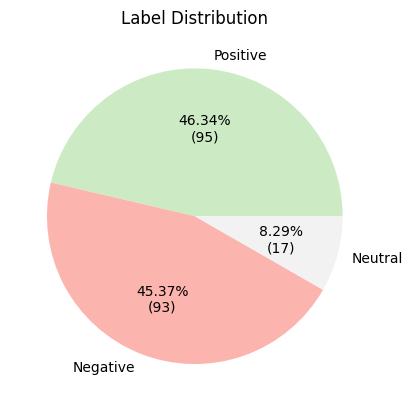

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Chart labels
label_counts = [pos, neg, neutral]
label_text = ["Positive", "Negative", "Neutral"]
pct_format = lambda x: "{:.2f}%\n({:.0f})".format(x, total*x/100)
color = ["#ccebc5", "#fbb4ae", "#f2f2f2"]

# Show pie chart
plt.title("Label Distribution")
plt.pie(label_counts, labels=label_text, autopct=pct_format, colors=color)
plt.show()

## Data Cleaning

### Helper functions

Defining data cleaning procedure in functions to make experimenting easier

In [8]:
import requests
import string
import json

# Split text
def split_text(text):
  return text.split()

# Punctuation
def remove_punctuation(text: str) -> str:
  return text.translate(str.maketrans('', '', string.punctuation))

# Lowercase
def lowercase(text: str) -> str:
  return text.lower()

# Stopwords
def get_stopwords() -> list[str]:
  STOPWORD_SOURCES = [
      "https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_stop_words.txt"
  ]

  stopwords = requests.get(STOPWORD_SOURCES[0]).text.split("\r\n")
  return stopwords

def remove_stopwords(text_split: list[str], stopwords: list[str]) -> list[str]:
  return [word for word in text_split if word not in stopwords]

# Slangs
def get_slangs() -> list[str]:
  SLANG_SOURCES = [
      "https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt"
  ]

  slangs = requests.get(SLANG_SOURCES[0]).json() # Convert json format to dict
  return slangs

def remove_slangs(text_split: list[str], slangs) -> list[str]:
  return [slangs.get(string, string) for string in text_split]

In [9]:
df_cleaned = df.copy()
stopwords = get_stopwords()
slangs = get_slangs()

# Basic cleaning
df_cleaned['Text'] = df_cleaned['Text'].apply(lambda x: split_text(lowercase(remove_punctuation(x))))

# Clean stopwords, slangs, etc
df_cleaned['Text'] = df_cleaned['Text'].apply(lambda x: remove_stopwords(x, stopwords))
df_cleaned['Text'] = df_cleaned['Text'].apply(lambda x: remove_slangs(x, slangs))
df_cleaned['word'] = df_cleaned['Text'].apply(lambda x: len(x))

df_cleaned

,no,sentiment,Text,char,word,source,author,type
0,1,Neutral,"[kelihatan, video, kutu, bukukalau, salah, ung...",241,19,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
1,2,Positive,"[hampir, videoia, melakukannya, didepan, books...",291,21,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
2,3,Neutral,"[channel, usung, tema, pengelolaan, keuanganaw...",181,13,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
3,4,Neutral,"[ferry, irwandi, pns, lulusan, stan, memulai, ...",279,24,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
4,5,Positive,"[videovideo, mengulas, permasalah, topik, duni...",382,29,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
...,...,...,...,...,...,...,...,...
200,201,Negative,"[3, barangnya, kirim, bersamaan, chacha, 2, me...",285,18,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post
201,202,Positive,"[anyway, alisa, suaminya, memention, akun, pri...",267,18,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post
202,203,Positive,"[postingan, alisa, respon, karena, paska, alis...",219,19,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post
203,204,Positive,"[wow, feedback, bagus, karena, alisa, suaminya...",154,11,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post


## Load Indo-BERT from Hugging Face Transformer

In [10]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 110.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 128.2 MB/s eta 0:00:00


In [11]:
# indolem/indobert-base-uncased
# indobenchmark/indobert-large-p2
from transformers import AutoTokenizer, TFAutoModel
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")
model = TFAutoModel.from_pretrained("indobenchmark/indobert-base-p2")

model.summary()

Some layers from the model checkpoint at indobenchmark/indobert-base-p2 were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at indobenchmark/indobert-base-p2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  124441344 
                                                                 
Total params: 124,441,344
Trainable params: 124,441,344
Non-trainable params: 0
_________________________________________________________________
